# Keras CNN 
Adapted from https://github.com/fchollet/keras/blob/master/examples/cifar10_cnn.py

In [27]:
import sys
import os
import numpy as np
import pandas as pd
import cPickle as pickle
from sklearn.model_selection import train_test_split
# from PIL import Image
# import png
import matplotlib.pyplot as plt
from datetime import datetime
import tensorflow as tf
%matplotlib inline
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [46]:
# Parameter setting
home = '/Users/chih-hsulin/'
batch_size = 32
num_classes = 10
epochs = 50
data_augmentation = True

In [4]:
# Load subset of training data
pFN = '../data/trainSubset.pkl'
pFile = open(pFN, 'rb')
trainX,trainY = pickle.load(pFile)
trainY = trainY - 1
trainY = keras.utils.to_categorical(trainY, num_classes)

In [5]:
pFN = home+'/data/COMP540Project2017/train.pkl'
pFile = open(pFN, 'rb')
trainX,trainY = pickle.load(pFile)
trainY = trainY - 1
trainY = keras.utils.to_categorical(trainY, num_classes)

[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]


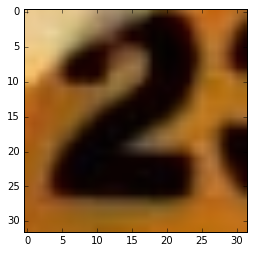

In [6]:
print(trainY[2])
plt.imshow(trainX[2])

In [18]:
# Load test data
pFN = home+'/data/COMP540Project2017/test.pkl'
pFile = open(pFN, 'rb')
testX = pickle.load(pFile)
testX.shape

(26032, 32, 32, 3)

In [19]:
print('x_train shape:', trainX.shape)
print(len(trainX), 'train samples')
print(len(testX), 'test samples')
test_train_ratio = float(len(testX))/(len(trainX)+len(testX))
test_train_ratio

x_train shape: (73257, 32, 32, 3)
73257 train samples
26032 test samples


0.2621841291583156

In [20]:
x_train, x_val, y_train, y_val = train_test_split(trainX, trainY, test_size=test_train_ratio, random_state=0)
print(x_train.shape)
print(x_val.shape)

(54050, 32, 32, 3)
(19207, 32, 32, 3)


# Build model

In [47]:
# CNN from Keras example
modelName = 'CNN_v2'
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [14]:
# CNNv1
modelName = 'CNN_v1'
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [48]:
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [21]:
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
testX = testX.astype('float32')
x_train /= 255
x_val /= 255
x_test = testX/255

In [49]:
if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_val, y_val),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        steps_per_epoch=x_train.shape[0] // batch_size,
                        epochs=epochs,
                        validation_data=(x_val, y_val))

Using real-time data augmentation.
Epoch 1/50
1689/1689 [==============================] - 444s - loss: 1.8387 - acc: 0.3557 - val_loss: 0.9393 - val_acc: 0.6951
Epoch 2/50
1689/1689 [==============================] - 406s - loss: 1.0495 - acc: 0.6579 - val_loss: 0.6057 - val_acc: 0.8115
Epoch 3/50
1689/1689 [==============================] - 402s - loss: 0.8790 - acc: 0.7203 - val_loss: 0.5251 - val_acc: 0.8343
Epoch 4/50
1689/1689 [==============================] - 398s - loss: 0.8149 - acc: 0.7437 - val_loss: 0.4700 - val_acc: 0.8553
Epoch 5/50
1689/1689 [==============================] - 404s - loss: 0.7854 - acc: 0.7569 - val_loss: 0.4988 - val_acc: 0.8517
Epoch 6/50
1689/1689 [==============================] - 400s - loss: 0.7981 - acc: 0.7590 - val_loss: 0.4628 - val_acc: 0.8655
Epoch 7/50
1689/1689 [==============================] - 392s - loss: 0.8088 - acc: 0.7559 - val_loss: 0.5850 - val_acc: 0.8216
Epoch 8/50
1689/1689 [==============================] - 393s - loss: 0.8225 

# Save model

In [50]:
date = datetime.now().strftime("%Y%m%d_%H%M")
model.save('../submission/'+date+"_"+modelName+'.h5')

# Make prediction

classes = model.predict(x_test, batch_size=batch_size)
classes2 = [np.argmax(x)+1 for x in classes]

# Output prediction

In [67]:
fout = open('../submission/'+date+"_"+modelName+'.csv','w')
fout.write('ImageId,label\n')
for i,x in enumerate(classes2):
    fout.write("{},{}\n".format(i,x))
fout.close()

10


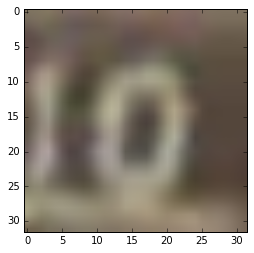

In [68]:
plt.imshow(testX[3])
print(classes2[3])

# Load modal and output prediction

In [69]:
date = '20170406_0002'
modelName = 'CNN_v1'
model = load_model(date+"_"+modelName+'.h5')
fout = open('../submission/'+date+"_"+modelName+'.csv','w')
fout.write('ImageId,label\n')
for i,x in enumerate(classes2):
    fout.write("{},{}\n".format(i,x))
fout.close()

IOError: Unable to open file (Unable to open file: name = '20170406_0002_cnn_v1.h5', errno = 2, error message = 'no such file or directory', flags = 0, o_flags = 0)